In [1]:
from PIL import Image
from torch_snippets import *
import numpy as np
import pandas as pd
import cv2
import os
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from numpy import moveaxis
from numpy import asarray
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

2021-09-30 13:15:14.391 | WARNING  | torch_snippets.torch_loader:<module>:233 - Error: No module named 'pytorch_lightning'
Not importing Lightning Report
2021-09-30 13:15:14.958 | WARNING  | torch_snippets:<module>:13 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'


In [2]:
def get_model():
  model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
  in_features = model.roi_heads.box_predictor.cls_score.in_features
  model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 3)
  return model.to(device)

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
model=get_model()
state_dict=torch.load(r'D:\ML_Projects_PyTorch\FasterRCNN\Code_Files\Faster_RCNN.pth')
model.load_state_dict(state_dict)
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

## Prediction - 1 

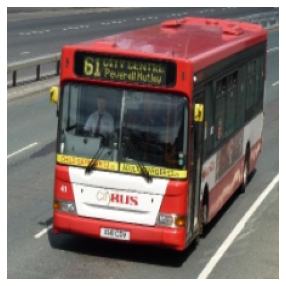

In [5]:
img_path=r'D:\ML_Projects_PyTorch\FasterRCNN\Dataset\images\ff8c3836bbaa2658.jpg'
img=(cv2.imread(img_path)[:,:,::-1])
img=cv2.resize(img, (224, 224))/255
show(img)

In [6]:
model.eval()
img=asarray(img)
img=moveaxis(img, 2, 0)
img = torch.tensor(img).float().view(-1, 3, 224, 224).to(device)
target_final=model(img)
print(target_final)

C:\Users\ROHIT MANDAL\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[{'boxes': tensor([[ 33.8297,   0.0000, 211.6672, 208.3921]], grad_fn=<StackBackward>), 'labels': tensor([1]), 'scores': tensor([0.9611], grad_fn=<IndexBackward>)}]


In [7]:
result=target_final[0]['boxes'].cpu().detach().numpy()
label=target_final[0]['labels'].cpu().detach().numpy()
scores=target_final[0]['scores'].cpu().detach().numpy()
xy=label.tolist()
for i in range(len(xy)):
    if(xy[i]==1):
        xy[i]='Bus'
    elif(xy[i]==2):
        xy[i]='Truck'
print(scores)

[0.9611363]


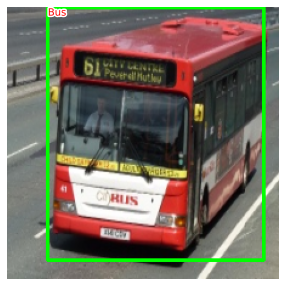

In [8]:
img10=read(img_path, 1)
img10=cv2.resize(img10, (224, 224))
show(img10, bbs=result, texts=xy ,sz=5)

## Prediction - 2

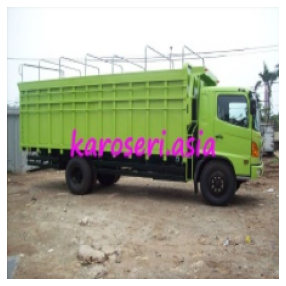

In [9]:
img_path=r'D:\ML_Projects_PyTorch\FasterRCNN\Dataset\images\0beb0745ed8a82b8.jpg'
img=(cv2.imread(img_path)[:,:,::-1])
img=cv2.resize(img, (224, 224))/255
show(img)

In [10]:
model.eval()
img=asarray(img)
img=moveaxis(img, 2, 0)
img = torch.tensor(img).float().view(-1, 3, 224, 224).to(device)
target_final=model(img)
print(target_final)

[{'boxes': tensor([[ 10.0860,  39.9434, 209.1999, 166.0811]], grad_fn=<StackBackward>), 'labels': tensor([2]), 'scores': tensor([0.9888], grad_fn=<IndexBackward>)}]


In [11]:
result=target_final[0]['boxes'].cpu().detach().numpy()
label=target_final[0]['labels'].cpu().detach().numpy()
scores=target_final[0]['scores'].cpu().detach().numpy()
xy=label.tolist()
for i in range(len(xy)):
    if(xy[i]==1):
        xy[i]='Bus'
    elif(xy[i]==2):
        xy[i]='Truck'
print(scores)

[0.9887994]


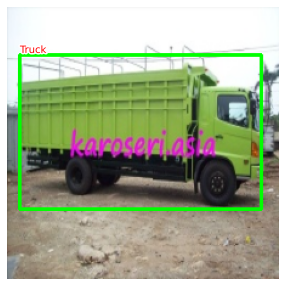

In [12]:
img10=read(img_path, 1)
img10=cv2.resize(img10, (224, 224))
show(img10, bbs=result, texts=xy ,sz=5)